In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from collections import defaultdict
from IPython.core.display import display, HTML

from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.stem import WordNetLemmatizer
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('D:/경기대/2학년_2학기/dna 동아리/23_겨울방학프로젝트/전처리csv/worldcup_passing.csv')

In [13]:
df.head()

,player,position,team,age,birth_year,minutes,round,passes_completed,passes,passes_total_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Andrej Kramarić,FW,Croatia,31,1991,477,semi finals,153,176,2049,...,35,38,7,12,0,4,0,3,1,4
1,Ante Budimir,FW,Croatia,31,1991,54,semi finals,2,5,12,...,0,2,0,0,0,1,0,0,0,0
2,Borna Barišić,DF,Croatia,30,1992,117,semi finals,50,69,818,...,19,27,5,11,0,1,2,4,3,3
3,Borna Sosa,DF,Croatia,24,1998,423,semi finals,220,278,3068,...,61,83,10,23,0,2,11,3,2,9
4,Bruno Petković,FW,Croatia,28,1994,234,semi finals,40,75,590,...,10,17,4,8,0,4,7,0,0,5


In [4]:
df=df[df['position']=='MF']
df

,player,position,team,age,birth_year,minutes,round,passes_completed,passes,passes_total_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
13,Lovro Majer,MF,Croatia,24,1998,126,semi finals,78,98,1165,...,27,34,3,8,0,2,5,4,3,5
14,Luka Modrić,MF,Croatia,37,1985,657,semi finals,465,551,7825,...,173,202,45,71,0,6,51,10,3,61
15,Marcelo Brozović,MF,Croatia,30,1992,549,semi finals,466,530,7429,...,151,167,48,54,0,5,31,1,0,25
18,Mateo Kovačić,MF,Croatia,28,1994,639,semi finals,415,460,6213,...,144,156,21,31,0,9,47,7,0,31
21,Abdelhamid Sabiri,MF,Morocco,26,1996,180,semi finals,45,58,690,...,7,13,7,10,1,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Adrien Rabiot,MF,France,27,1995,486,finals,237,284,3769,...,83,94,18,26,1,3,36,0,0,13
654,Antoine Griezmann,MF,France,31,1991,540,finals,258,329,4905,...,89,112,42,66,3,21,26,10,5,19
655,Aurélien Tchouaméni,MF,France,22,2000,621,finals,426,474,7467,...,204,219,31,43,0,6,48,3,0,37
662,Jordan Veretout,MF,France,29,1993,63,finals,33,36,609,...,16,16,4,4,0,0,3,0,0,1


In [6]:
df.head()

,player,position,team,age,birth_year,minutes,round,passes_completed,passes,passes_total_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
13,Lovro Majer,MF,Croatia,24,1998,126,semi finals,78,98,1165,...,27,34,3,8,0,2,5,4,3,5
14,Luka Modrić,MF,Croatia,37,1985,657,semi finals,465,551,7825,...,173,202,45,71,0,6,51,10,3,61
15,Marcelo Brozović,MF,Croatia,30,1992,549,semi finals,466,530,7429,...,151,167,48,54,0,5,31,1,0,25
18,Mateo Kovačić,MF,Croatia,28,1994,639,semi finals,415,460,6213,...,144,156,21,31,0,9,47,7,0,31
21,Abdelhamid Sabiri,MF,Morocco,26,1996,180,semi finals,45,58,690,...,7,13,7,10,1,3,3,0,0,0


In [7]:
#범주형 변수
bum=df.iloc[:,:7]
bum.head()

,player,position,team,age,birth_year,minutes,round
13,Lovro Majer,MF,Croatia,24,1998,126,semi finals
14,Luka Modrić,MF,Croatia,37,1985,657,semi finals
15,Marcelo Brozović,MF,Croatia,30,1992,549,semi finals
18,Mateo Kovačić,MF,Croatia,28,1994,639,semi finals
21,Abdelhamid Sabiri,MF,Morocco,26,1996,180,semi finals


In [28]:
#패스관련 변수만 불러오기
pass_df=df.filter(like='passes')

In [27]:
bum.describe()

,age,birth_year,minutes
count,225.000000,225.000000,225.000000
mean,26.688889,1995.284444,173.480000
std,4.272118,4.276073,144.028769
min,18.000000,1983.000000,0.000000
25%,24.000000,1992.000000,54.000000
50%,27.000000,1995.000000,144.000000
75%,30.000000,1998.000000,270.000000
max,39.000000,2004.000000,657.000000


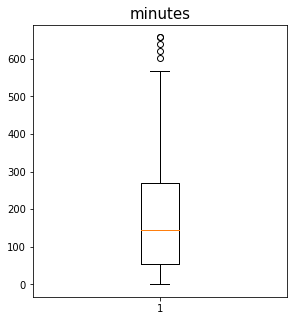

In [32]:
col_list = ['minutes'] 
plt.figure(figsize=(10, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(1, 2, 1)
  plt.boxplot(bum['minutes'])
  plt.title(col, fontsize=15)

In [34]:
bum['minutes'].describe()

count    225.000000
mean     173.480000
std      144.028769
min        0.000000
25%       54.000000
50%      144.000000
75%      270.000000
max      657.000000
Name: minutes, dtype: float64

In [54]:
q1=bum[bum['minutes']>=54]
q2=bum[bum['minutes']>=144]
q3=bum[bum['minutes']>=270]

In [37]:
print(q1['player'].count(),q2['player'].count(),q3['player'].count())

170 116 58


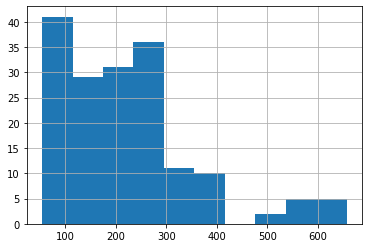

In [39]:
q1['minutes'].hist()

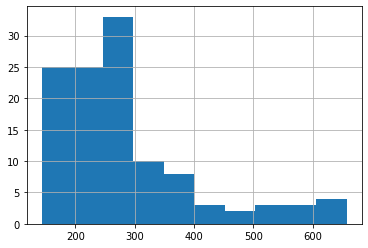

In [40]:
q2['minutes'].hist()

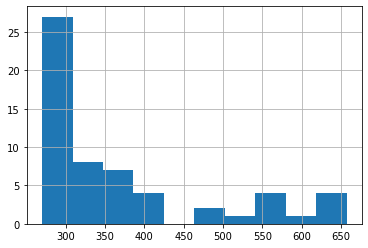

In [41]:
q3['minutes'].hist()

In [56]:
#출전시간이 2사분위수 이상인 MF들만 보기로 결정
targets = ['passes_completed', 'passes', 'passes_total_distance',
       'passes_progressive_distance', 'passes_completed_short', 'passes_short',
       'passes_completed_medium', 'passes_medium', 'passes_completed_long',
       'passes_long', 'passes_into_final_third', 'passes_into_penalty_area',
       'progressive_passes']

In [48]:
pass_df.columns

Index(['passes_completed', 'passes', 'passes_total_distance',
       'passes_progressive_distance', 'passes_completed_short', 'passes_short',
       'passes_completed_medium', 'passes_medium', 'passes_completed_long',
       'passes_long', 'passes_into_final_third', 'passes_into_penalty_area',
       'progressive_passes'],
      dtype='object')

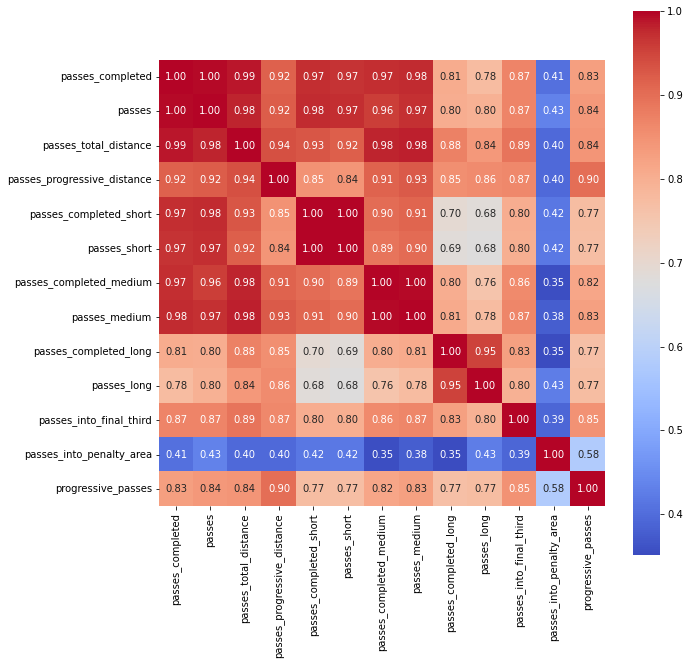

In [57]:
df2=df[df['minutes']>=144]
corr = df2[targets].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square=True, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [61]:
#completed 관련 변수 삭제 
df=df.drop(['passes_completed','passes_completed_short','passes_completed_medium','passes_completed_long'],axis=1)

In [8]:
df_pass=df.filter(like='passes')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_pass), columns=df_pass.columns, index = df_pass.index)

In [10]:
df_pass.head()

,passes_completed,passes,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,passes_into_final_third,passes_into_penalty_area,progressive_passes
13,78,98,1165,300,43,47,27,34,3,8,5,4,5
14,465,551,7825,2857,229,244,173,202,45,71,51,10,61
15,466,530,7429,1726,253,279,151,167,48,54,31,1,25
18,415,460,6213,1384,236,250,144,156,21,31,47,7,31
21,45,58,690,122,30,33,7,13,7,10,3,0,0


In [11]:
# 2. 주성분 분석 fit 

# 고윳값을 기준으로 설명할 수 있는 분산량
pca = PCA(n_components=2) #주성분은 2개로 해야 2차원 산점도로 표현 쉬움
printcipalComponents = pca.fit_transform(df_scale)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pca1', 'pca2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [12]:
principalDf.head()

,pca1,pca2
0,-0.020651,0.226988
1,2.726599,0.278194
2,2.171343,-0.519975
3,1.897970,0.091863
4,-0.255465,-0.084712


In [13]:
#고윳값 (설명력)
print('주성분의 설명력:', pca.explained_variance_ratio_)
print('전체 분산에 대한 설명력:',sum(pca.explained_variance_ratio_))

주성분의 설명력: [0.87134675 0.06392123]
전체 분산에 대한 설명력: 0.9352679792298717


In [14]:
#고유벡터 (eigenvector)
print('pca1의 고유벡터:', np.round(pca.components_[0],3), sep = '\n')
print('                                    ')
print('pca2의 고유벡터', np.round(pca.components_[1],3) , sep= '\n')

pca1의 고유벡터:
[0.331 0.317 0.336 0.238 0.269 0.267 0.3   0.308 0.277 0.283 0.227 0.211
 0.197]
                                    
pca2의 고유벡터
[-0.096 -0.051 -0.116 -0.048 -0.048 -0.036 -0.143 -0.114 -0.084  0.031
 -0.052  0.954  0.123]


In [15]:
a = np.round(pca.components_[0],3)
a = a.tolist()
b = np.round(pca.components_[1],3)
b = b.tolist()

In [16]:
pca_data = {'pca1' : a, 'pca2' : b}
df_pca = pd.DataFrame(pca_data, index= df_pass.columns)
df_pca

,pca1,pca2
passes_completed,0.331,-0.096
passes,0.317,-0.051
passes_total_distance,0.336,-0.116
passes_progressive_distance,0.238,-0.048
passes_completed_short,0.269,-0.048
passes_short,0.267,-0.036
passes_completed_medium,0.300,-0.143
passes_medium,0.308,-0.114
passes_completed_long,0.277,-0.084
passes_long,0.283,0.031


In [17]:
#범주형 변수를 가진 df와 병합
df_info=df[df['minutes']>=144]
df_info = df_info.iloc[:,0:7]

In [18]:
df_info=df_info.reset_index()

In [19]:
df_info=df_info.drop(columns=['index'],axis=1)

In [20]:
df_info

,player,position,team,age,birth_year,minutes,round
0,Luka Modrić,MF,Croatia,37,1985,657,semi finals
1,Marcelo Brozović,MF,Croatia,30,1992,549,semi finals
2,Mateo Kovačić,MF,Croatia,28,1994,639,semi finals
3,Abdelhamid Sabiri,MF,Morocco,26,1996,180,semi finals
4,Azzedine Ounahi,MF,Morocco,22,2000,567,semi finals
...,...,...,...,...,...,...,...
111,Ángel Di María,MF,Argentina,34,1988,288,finals
112,Adrien Rabiot,MF,France,27,1995,486,finals
113,Antoine Griezmann,MF,France,31,1991,540,finals
114,Aurélien Tchouaméni,MF,France,22,2000,621,finals


In [21]:
principalDf

,pca1,pca2
0,-0.020651,0.226988
1,2.726599,0.278194
2,2.171343,-0.519975
3,1.897970,0.091863
4,-0.255465,-0.084712
...,...,...
220,0.887858,-0.336820
221,1.508096,0.482342
222,2.139345,-0.345291
223,-0.329588,-0.077921


In [89]:
result = pd.concat([df_info, principalDf], axis=1)
result

,player,position,team,age,birth_year,minutes,round,pca1,pca2
0,Luka Modrić,MF,Croatia,37.0,1985.0,657.0,semi finals,0.013019,0.223214
1,Marcelo Brozović,MF,Croatia,30.0,1992.0,549.0,semi finals,2.316083,0.196700
2,Mateo Kovačić,MF,Croatia,28.0,1994.0,639.0,semi finals,1.605713,-0.515992
3,Abdelhamid Sabiri,MF,Morocco,26.0,1996.0,180.0,semi finals,1.531950,0.064464
4,Azzedine Ounahi,MF,Morocco,22.0,2000.0,567.0,semi finals,-0.228253,-0.078904
...,...,...,...,...,...,...,...,...,...
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687632,-0.352859
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289165,0.443952
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700170,-0.361297
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.285882,-0.066456


In [85]:
df_info.head()

,player,position,team,age,birth_year,minutes,round
14,Luka Modrić,MF,Croatia,37,1985,657,semi finals
15,Marcelo Brozović,MF,Croatia,30,1992,549,semi finals
18,Mateo Kovačić,MF,Croatia,28,1994,639,semi finals
21,Abdelhamid Sabiri,MF,Morocco,26,1996,180,semi finals
27,Azzedine Ounahi,MF,Morocco,22,2000,567,semi finals


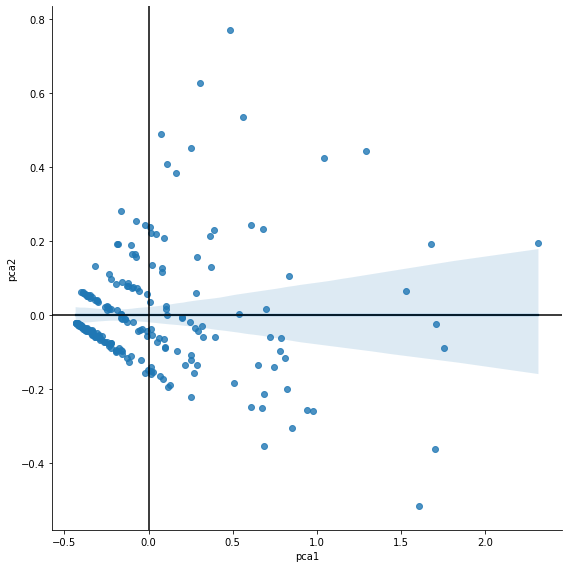

In [90]:
sns.lmplot(x="pca1", y="pca2", height=8, data=result) #height는 이미지 사이즈
plt.axvline(x=0, color = 'black') 
plt.axhline(y=0, color = 'black')
plt.show()